## Linear Regression
Linear regression is a statistical method used for modeling the relationship between a dependent variable Y and one or more independent variable X.

### Assumptions
1. Linearity
2. Independence: Observations are independent of each other.
3. Homoscedasticity: Constant variance of residuals.
4. Number of Residuals
5. No Multicollinearity: Independent variables should not be highly correlated with each other.

### Limitations
1. Linear relationship
2. Sensitive to outliers
3. Multicollinearity can lead to msleading interpretations of coefficients.

In [4]:
# Pseudo Code
# Linear regression eqn: y = AX + b, A is matrix of coefficients. b is bias or intercept
# initialize the class with coefficients and intercept 
# y dependent variable
# bias term b or intercept
# weights a1, a2, a3, ... or coef
# final equation y = a1.x1 + a2.x2 + ... + an.xn + b 

In [5]:
#Function fit(X, y):
    # Add a bias term (column of ones) to X
    # Compute coefficients using:
        # θ = (X^T * X)^(-1) * X^T * y
    # Set intercept as first value of θ
    # Set coefficients as the remaining values of θ
# End Function

# Function predict(X):
    # Add a bias term (column of ones) to X
    # Return X * θ (predicted values)
# End Function


In [8]:
import numpy as np

In [9]:
# Linear Regression using Normal Equation: theta = (X^T.X)^(-1).X^T.y

class CustomLinearRegression:
    def __init__(self):
        self.coeff_ = None
        self.intercept_ = None

    def fit(self, X, y):
        # Adding a bias term i.e. column of ones [1,1,1, ...]
        # Before: X = [[1], [2], [3]]
        # After:  X = [[1, 1], [1, 2], [1, 3]]
        # np.c_ is used for column-wise concatenation of arrays.
        X = np.c_[np.ones(X.shape[0]), X] 

        # Computing the regression coefficient using Normal Equation
        # Normal Eqn: theta = (X^T.X)^(-1).X^T.y
        # @ indicates matrix multiplication
        theta = np.linalg.inv(X.T @ X) @ X.T @ y 

        # Extracting intercept and coefficients
        self.intercept_ = theta[0]
        self.coeff_ = theta[1:]
    
    # Making prediction
    def predict(self, X):
        # Adding bias term
        X = np.c_[np.ones(X.shape[0]), X]
        # Returning predictions
        # np.r_ is used for row-wise concatenation of arrays.
        return X @ np.r_[self.intercept_, self.coeff_] 



In [10]:
# Example usage
X = np.array([[1], [2], [3], [4], [5]])  # Feature
y = np.array([2, 4, 6, 8, 10])  # Target (y = 2x)


In [11]:

model = CustomLinearRegression()
model.fit(X, y)
predictions = model.predict(np.array([[6], [7]]))
print("Predictions:", predictions)

Predictions: [12. 14.]


In [12]:
# Function fit(X, y, learning_rate, epochs):
    # Add a bias term (column of ones) to X
    # Initialize weights (θ) with zeros
    # Set number of samples (m)

    # For i in range(epochs):
        # Get the number of data samples and features.
        # Compute predictions using the current weights and bias.
        # Calculate errors (difference between actual values and predictions).
        # Compute gradients for weights and bias using the derivatives of the loss function.
        # Update weights and bias by subtracting the product of the learning rate and gradients.
        # End Function

# Function predict(X):
    # Add a bias term (column of ones) to X
    # Use the learned weights and bias to make predictions for new input data.
# End Function


In [13]:
# Using Gradient Descent
class LinearRegressionGD:
    def __init__(self, learning_rate=0.01, epochs=1000):
        self.learning_rate = learning_rate
        self.epochs = epochs
        self.coef_ = None
        self.intercept_ = None

    def fit(self, X, y):

        n_samples, n_features = X.shape
        self.coef_ = np.zeros(n_features)
        self.intercept_ = 0

        for _ in range(self.epochs):
            y_pred = np.dot(X, self.coef_) + self.intercept_

            dw = (1/n_samples) * np.dot(X.T, (y_pred - y))
            db = (1/n_samples) * np.sum(y_pred - y)

            self.coef_ = self.coef_ - self.learning_rate * dw
            self.intercept_ = self.intercept_ - self.learning_rate * db


    def predict(self, X):
        y_pred = np.dot(X, self.coef_) + self.intercept_
        return y_pred


In [14]:

# Example usage
model = LinearRegressionGD()
model.fit(X, y)
predictions = model.predict(np.array([[6], [7]]))
print("Predictions:", predictions)

Predictions: [11.93728249 13.91103737]


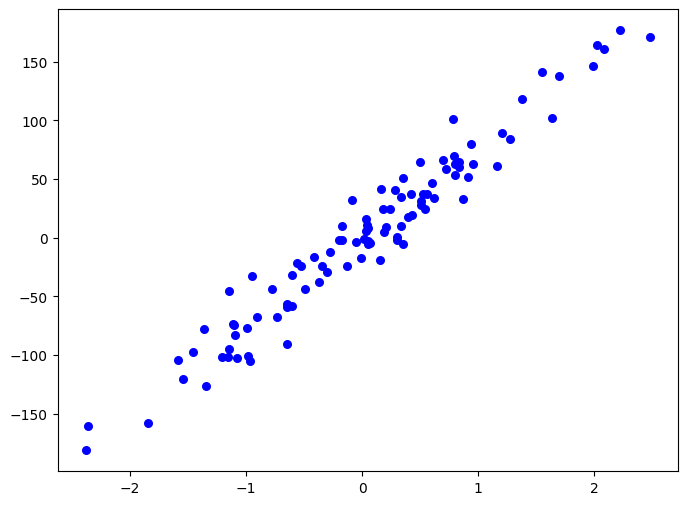

305.7719958301902


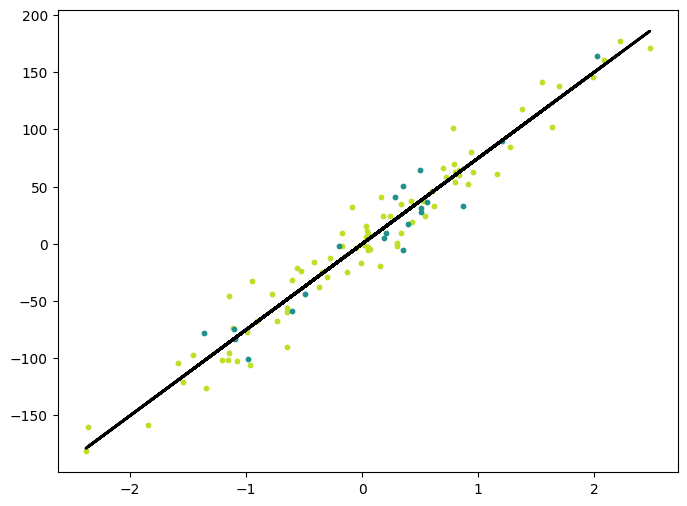

In [19]:
# Test on scikit learn datasets

import numpy as np
from sklearn.model_selection import train_test_split
from sklearn import datasets
import matplotlib.pyplot as plt

X, y = datasets.make_regression(n_samples=100, n_features=1, noise=20, random_state=4)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1234)

fig = plt.figure(figsize=(8,6))
plt.scatter(X[:, 0], y, color = "b", marker = "o", s = 30)
plt.show()

reg = LinearRegressionGD(learning_rate=0.01)
reg.fit(X_train,y_train)
predictions = reg.predict(X_test)

def mse(y_test, predictions):
    return np.mean((y_test-predictions)**2)

mse = mse(y_test, predictions)
print(mse)

y_pred_line = reg.predict(X)
cmap = plt.get_cmap('viridis')
fig = plt.figure(figsize=(8,6))
m1 = plt.scatter(X_train, y_train, color=cmap(0.9), s=10)
m2 = plt.scatter(X_test, y_test, color=cmap(0.5), s=10)
plt.plot(X, y_pred_line, color='black', linewidth=2, label='Prediction')
plt.show()